In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:

train_data = pd.read_csv('train-clean.csv',delimiter=',')
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29210 entries, 0 to 29209
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_age                29210 non-null  float64
 1   job_type                    29210 non-null  int64  
 2   marital                     29210 non-null  int64  
 3   education                   29210 non-null  int64  
 4   default                     29210 non-null  int64  
 5   balance                     29210 non-null  float64
 6   housing_loan                29210 non-null  int64  
 7   personal_loan               29210 non-null  int64  
 8   month                       29210 non-null  int64  
 9   last_contact_duration       29210 non-null  float64
 10  num_contacts_in_campaign    29210 non-null  float64
 11  num_contacts_prev_campaign  29210 non-null  int64  
 12  prev_campaign_outcome       29210 non-null  int64  
 13  term_deposit_subscribed     292

In [53]:
input_names = list(train_data.columns)
input_names.remove('term_deposit_subscribed')

all_inputs = train_data[input_names]
all_labels = train_data['term_deposit_subscribed']

In [54]:
from sklearn.model_selection import train_test_split

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)

In [55]:
from sklearn.tree import DecisionTreeClassifier
clf= DecisionTreeClassifier()
clf.fit(training_inputs, training_classes)

DecisionTreeClassifier()

In [56]:
predictions = clf.predict(testing_inputs)
predictions

array([0, 0, 1, ..., 0, 0, 0])

In [57]:
from sklearn.metrics import accuracy_score
accuracy_score(testing_classes,predictions)

0.893057647542106

In [58]:
#from sklearn import tree
#from matplotlib import pyplot as plt

#feature_names = train_data.columns
#fig = plt.figure(figsize=(40,40))
#_ = tree.plot_tree(clf,feature_names=feature_names,class_names={0:'Subscribed',1:'NotSubscribed'},filled=True,fontsize=4)

In [59]:
feature_names = input_names
feature_names

['customer_age',
 'job_type',
 'marital',
 'education',
 'default',
 'balance',
 'housing_loan',
 'personal_loan',
 'month',
 'last_contact_duration',
 'num_contacts_in_campaign',
 'num_contacts_prev_campaign',
 'prev_campaign_outcome',
 'mid_month']

In [60]:
clf.feature_importances_

array([0.12355125, 0.04376149, 0.02044771, 0.03454012, 0.00167806,
       0.14351706, 0.02283747, 0.01058531, 0.11737097, 0.31848716,
       0.03802724, 0.01381138, 0.08874044, 0.02264434])

In [61]:
feature_importance = pd.DataFrame(clf.feature_importances_, index =feature_names).sort_values(0, ascending=False)
feature_importance

,0
last_contact_duration,0.318487
balance,0.143517
customer_age,0.123551
month,0.117371
prev_campaign_outcome,0.088740
job_type,0.043761
num_contacts_in_campaign,0.038027
education,0.034540
housing_loan,0.022837
mid_month,0.022644


<Axes: >

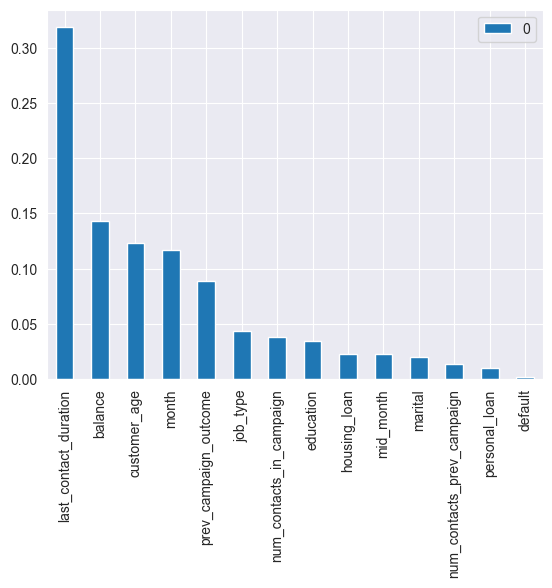

In [62]:
feature_importance.head(14).plot(kind='bar')

(array([  3.,  15.,  72., 116., 210., 252., 180., 115.,  27.,  10.]),
 array([0.87621525, 0.87839244, 0.88056963, 0.88274682, 0.884924  ,
        0.88710119, 0.88927838, 0.89145557, 0.89363275, 0.89580994,
        0.89798713]),
 <BarContainer object of 10 artists>)

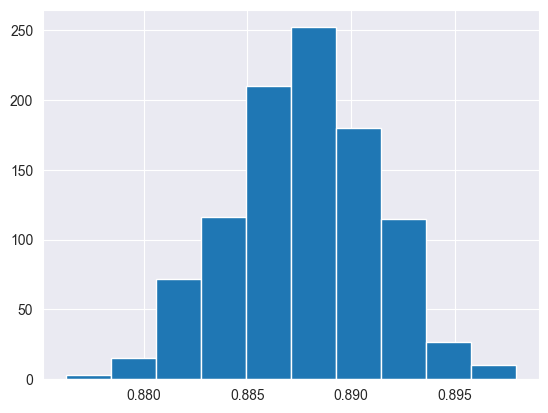

In [63]:
%matplotlib inline

import matplotlib.pyplot as plt


model_accuracies = []

for repetition in range(1000):
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25)

    decision_tree_classifier = DecisionTreeClassifier()
    decision_tree_classifier.fit(training_inputs, training_classes)
    classifier_accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)
    model_accuracies.append(classifier_accuracy)

plt.hist(model_accuracies)

Text(0.5, 1.0, 'Average score: 0.8888736733995207')

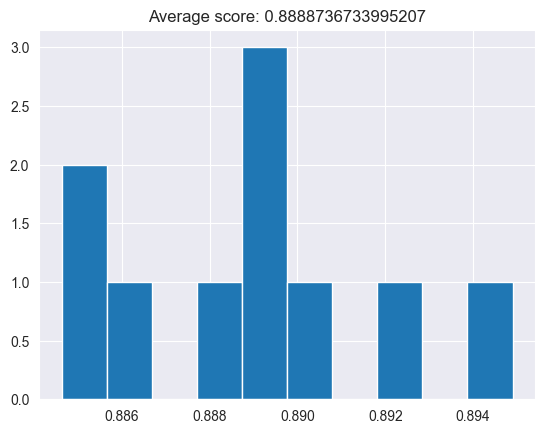

In [64]:
from sklearn.model_selection import cross_val_score

decision_tree_classifier = DecisionTreeClassifier()

# cross_val_score returns a list of the scores, which we can visualize
# to get a reasonable estimate of our classifier's performance
cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=10)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

In [91]:
from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'max_depth': [3, 5, 8, 11, 14, 17, 20],
                  'max_features': [7, 8, 9, 10, 11, 12, 13, 14]}



grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=10)

grid_search.fit(all_inputs, all_labels)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.9147894556658678
Best parameters: {'max_depth': 5, 'max_features': 10}


Text(50.722222222222214, 0.5, 'max_depth')

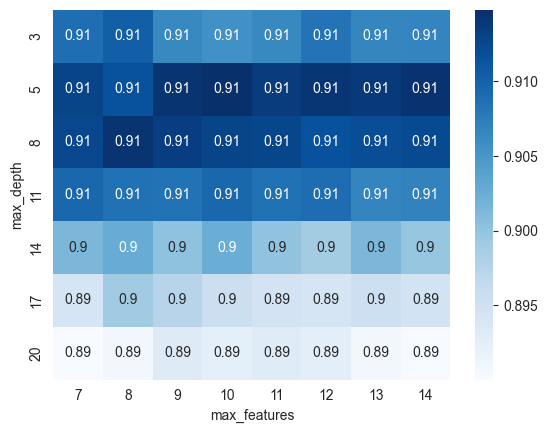

In [92]:
grid_visualization = grid_search.cv_results_['mean_test_score']
grid_visualization.shape = (7, 8)
sns.heatmap(grid_visualization, cmap='Blues', annot=True)
plt.xticks(np.arange(8) + 0.5, grid_search.param_grid['max_features'])
plt.yticks(np.arange(7) + 0.5, grid_search.param_grid['max_depth'])
plt.xlabel('max_features')
plt.ylabel('max_depth')

In [96]:
decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'criterion': ['gini', 'entropy', 'log_loss'],
                  'splitter': ['best', 'random'],
                  'max_depth': [3, 5, 8, 11, 14, 17, 20],
                  'max_features': [7, 8, 9, 10, 11, 12, 13, 14]}


grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=10)

grid_search.fit(all_inputs, all_labels)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))
print('Best estimator: {}'.format(grid_search.best_estimator_))

Best score: 0.9149263950701816
Best parameters: {'criterion': 'gini', 'max_depth': 8, 'max_features': 10, 'splitter': 'random'}
Best estimator: DecisionTreeClassifier(max_depth=8, max_features=10, splitter='random')
Best score: 0.916090380006847
Best parameters: {'criterion': 'log_loss', 'max_depth': 5, 'max_features': 10, 'splitter': 'best'}
Best estimator: DecisionTreeClassifier(criterion='log_loss', max_depth=5, max_features=10)


In [101]:
input_names.remove('default')
input_names.remove('personal_loan')
input_names.remove('num_contacts_prev_campaign')

all_inputs = train_data[input_names]


In [102]:

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)

In [103]:
clf= DecisionTreeClassifier()
clf.fit(training_inputs, training_classes)

DecisionTreeClassifier()

In [104]:
predictions = clf.predict(testing_inputs)
accuracy_score(testing_classes,predictions)

0.89264685745584

<Axes: >

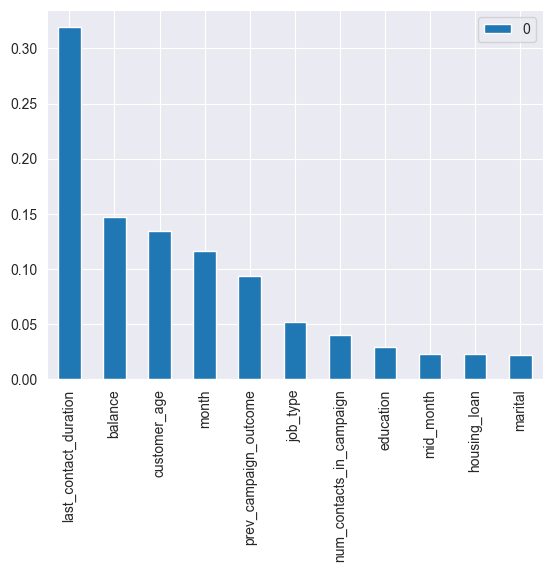

In [108]:
feature_names = input_names
feature_importance = pd.DataFrame(clf.feature_importances_, index =feature_names).sort_values(0, ascending=False)
feature_importance.head(11).plot(kind='bar')

In [106]:
decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'criterion': ['gini', 'entropy', 'log_loss'],
                  'splitter': ['best', 'random'],
                  'max_depth': [3, 5, 8, 11, 14, 17, 20],
                  'max_features': [7, 8, 9, 10, 11]}


grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=10)

grid_search.fit(all_inputs, all_labels)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))
print('Best estimator: {}'.format(grid_search.best_estimator_))

Best score: 0.9157137966449846
Best parameters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 11, 'splitter': 'best'}
Best estimator: DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features=11)
